In [9]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns

In [10]:
df = pd.read_csv('TractorSales.csv', parse_dates=True)
df.tail(5)

,Month-Year,Number of Tractor Sold
139,14-Aug,848
140,14-Sep,640
141,14-Oct,581
142,14-Nov,519
143,14-Dec,605


In [11]:
#Convert df into timeseries df

df['Timestamp'] = pd.to_datetime(df['Month-Year'], format='%d-%b')
df.drop (['Month-Year'], axis=1, inplace=True)
df.set_index(['Timestamp'], drop=True, inplace=True)
df.head(5)

,Number of Tractor Sold
Timestamp,
1900-01-03,141
1900-02-03,157
1900-03-03,185
1900-04-03,199
1900-05-03,203


<Axes: xlabel='Timestamp'>

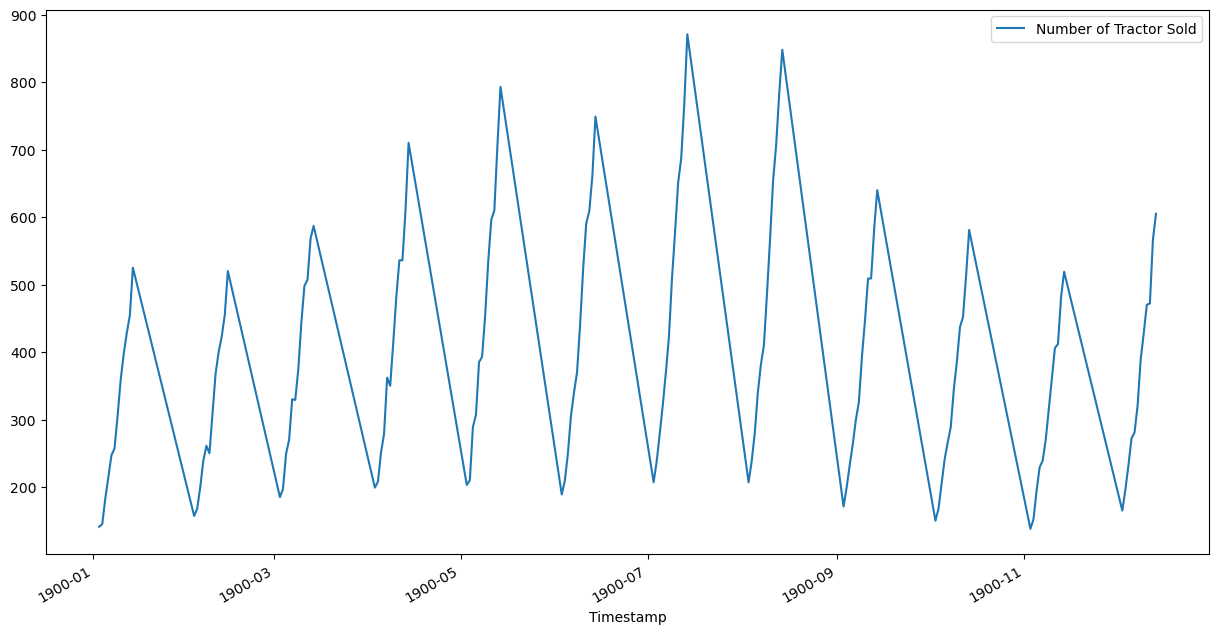

In [12]:
df.plot()

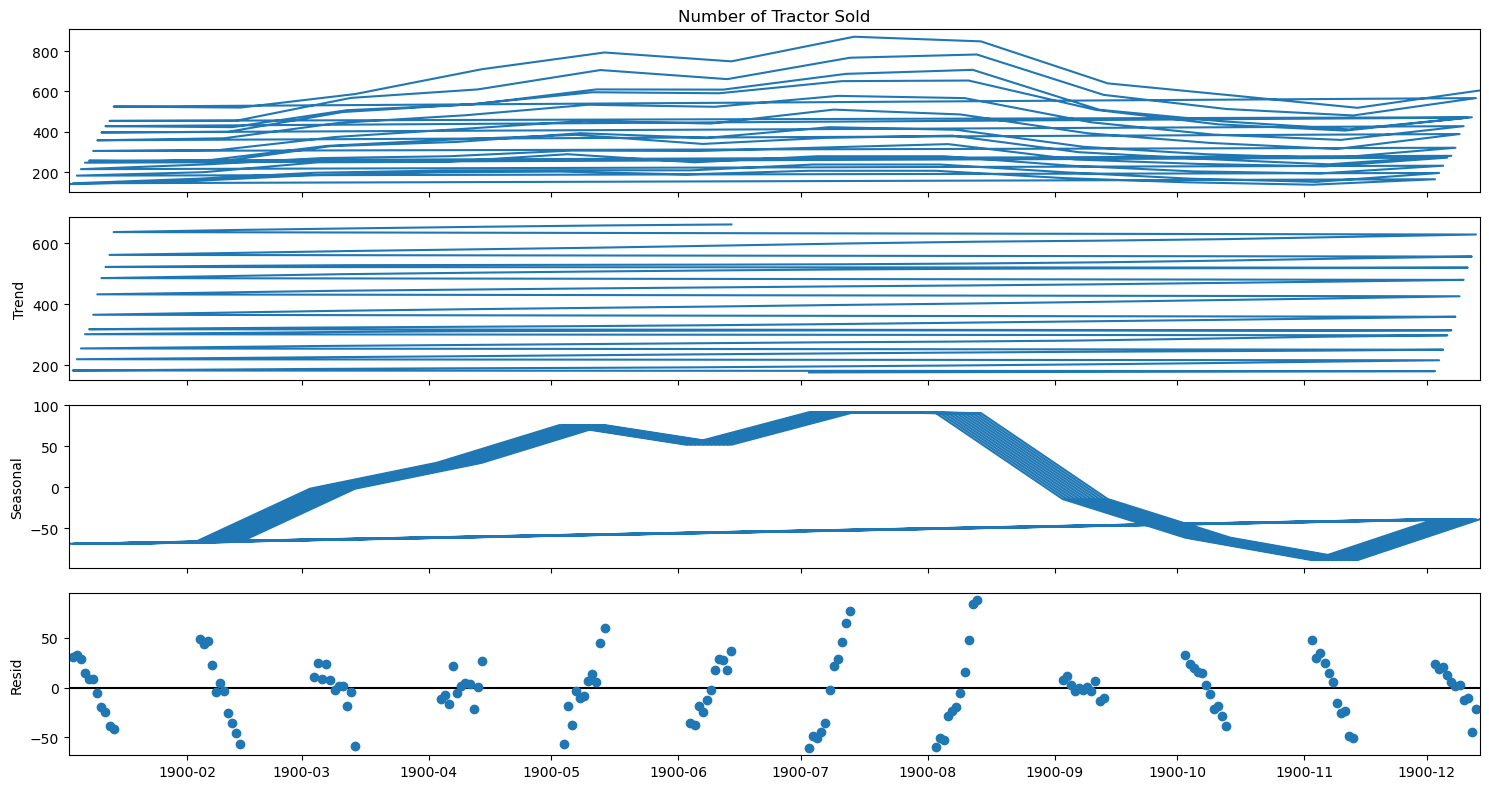

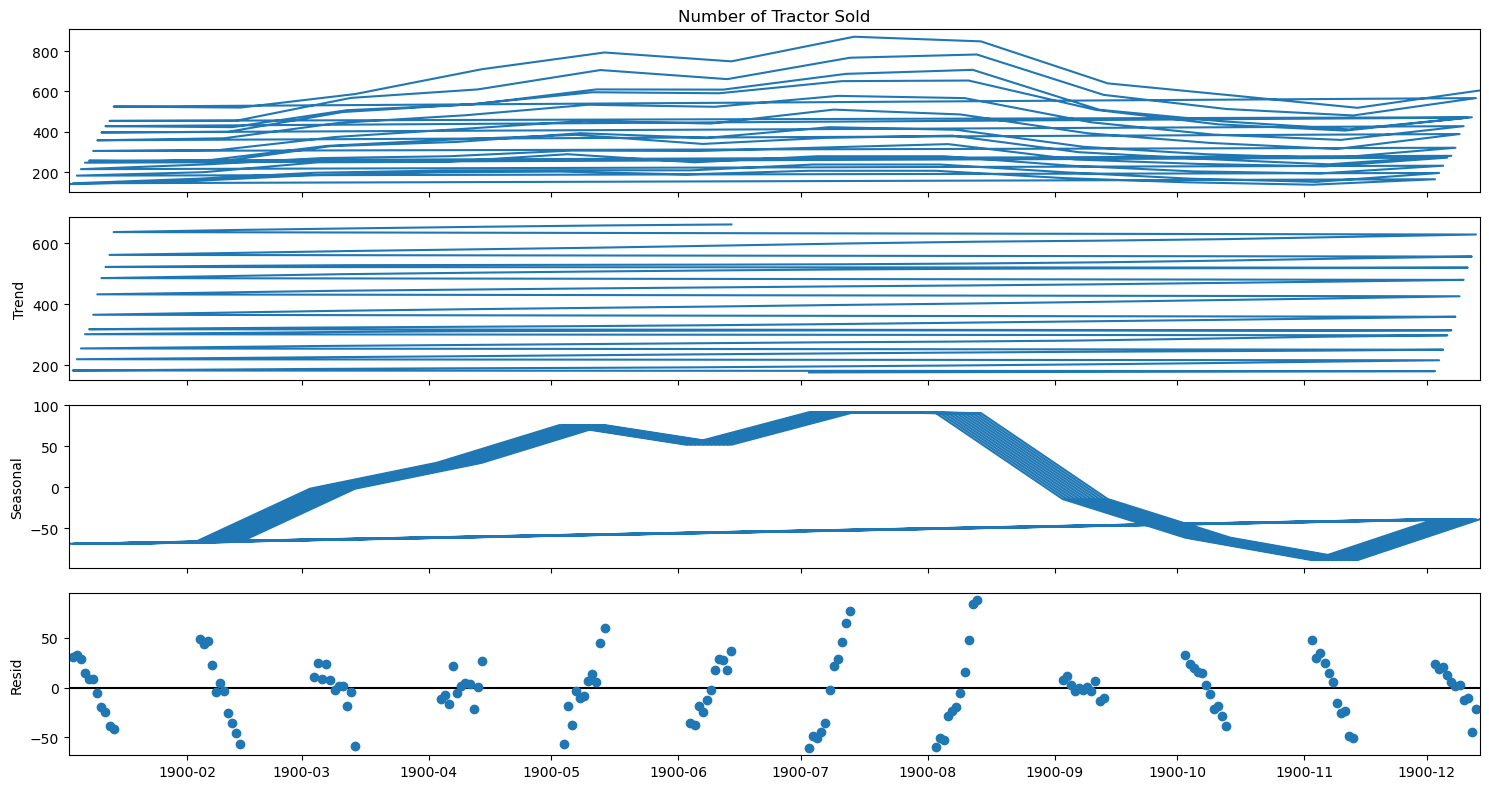

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = 15,8
decomposer = seasonal_decompose(df['Number of Tractor Sold'], period=12)
decomposer.plot()  #Data is multiplicative as seasonality isnt constant alongside trend


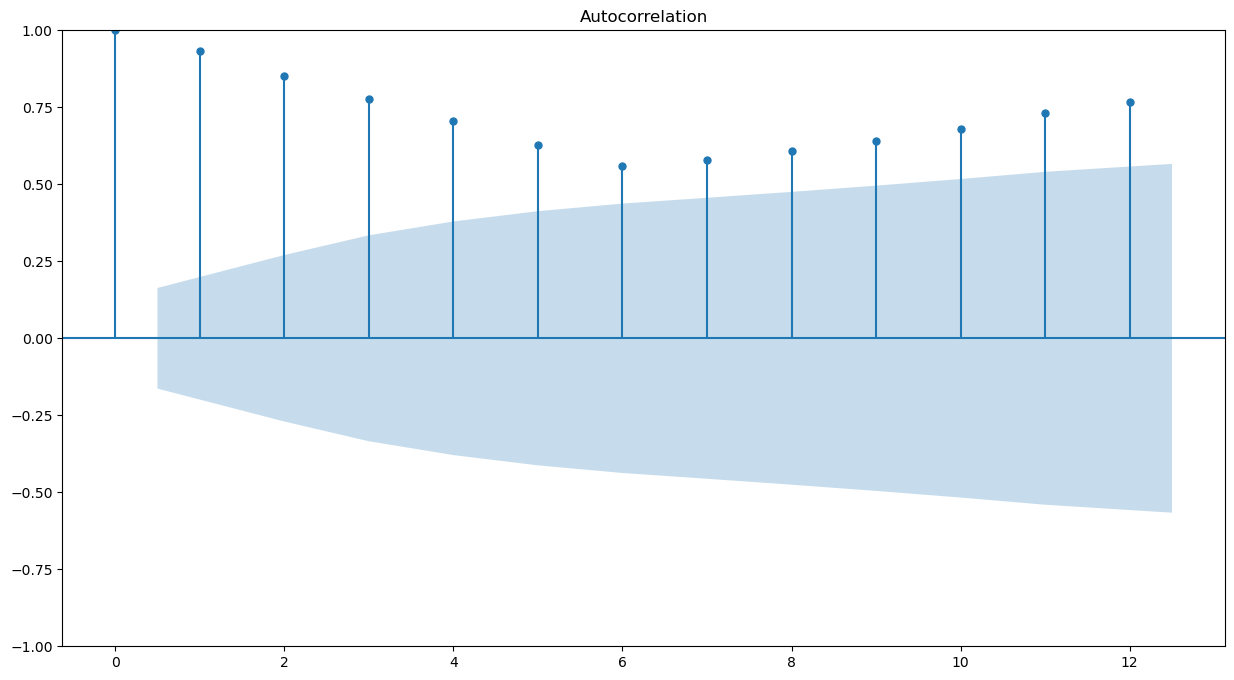

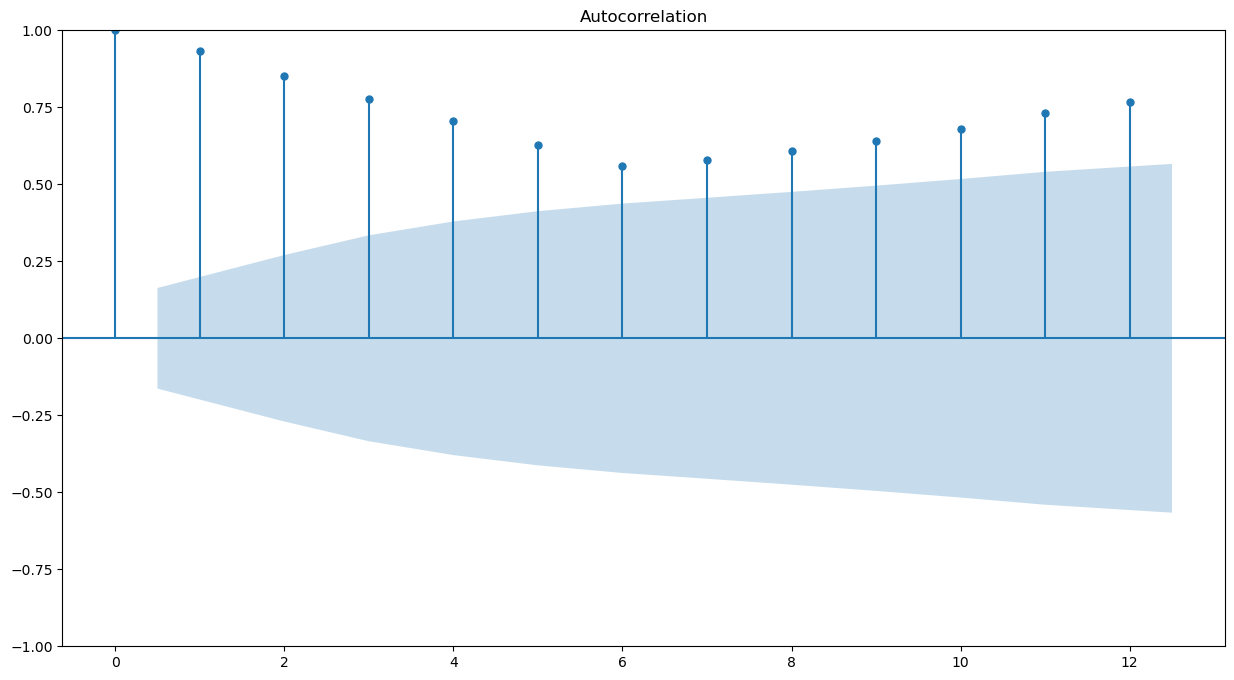

In [14]:
#plotting ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=12)


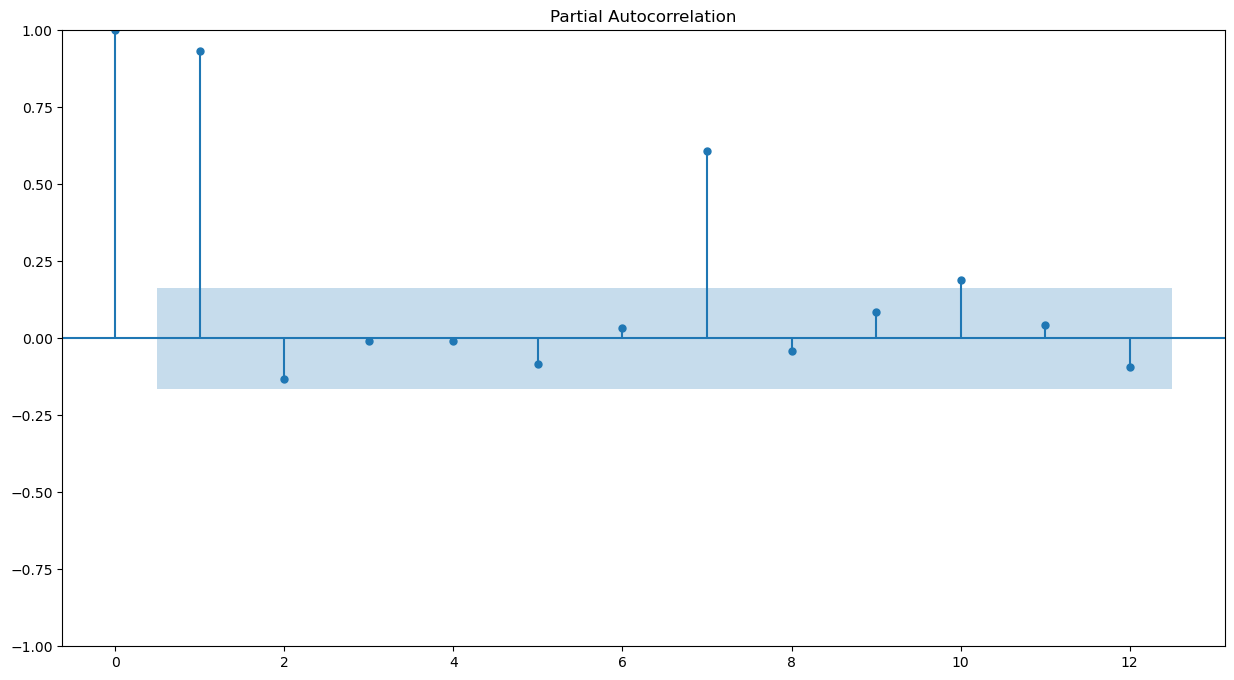

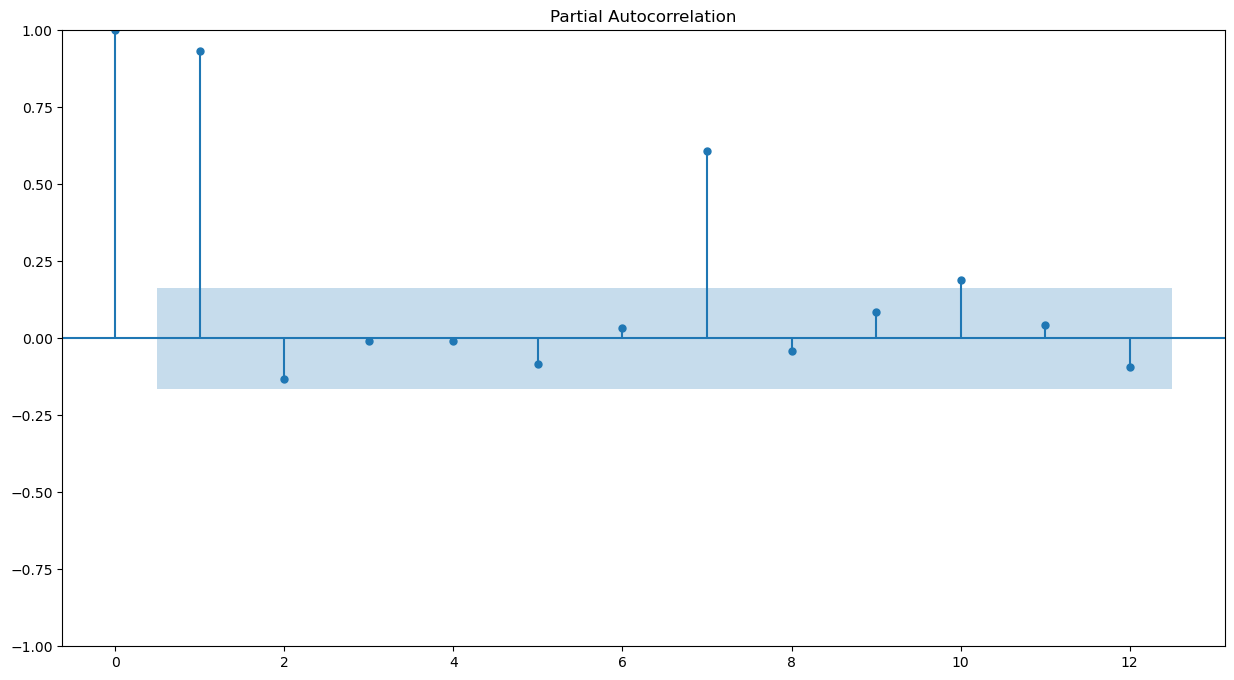

In [15]:
plot_pacf(df, lags=12)

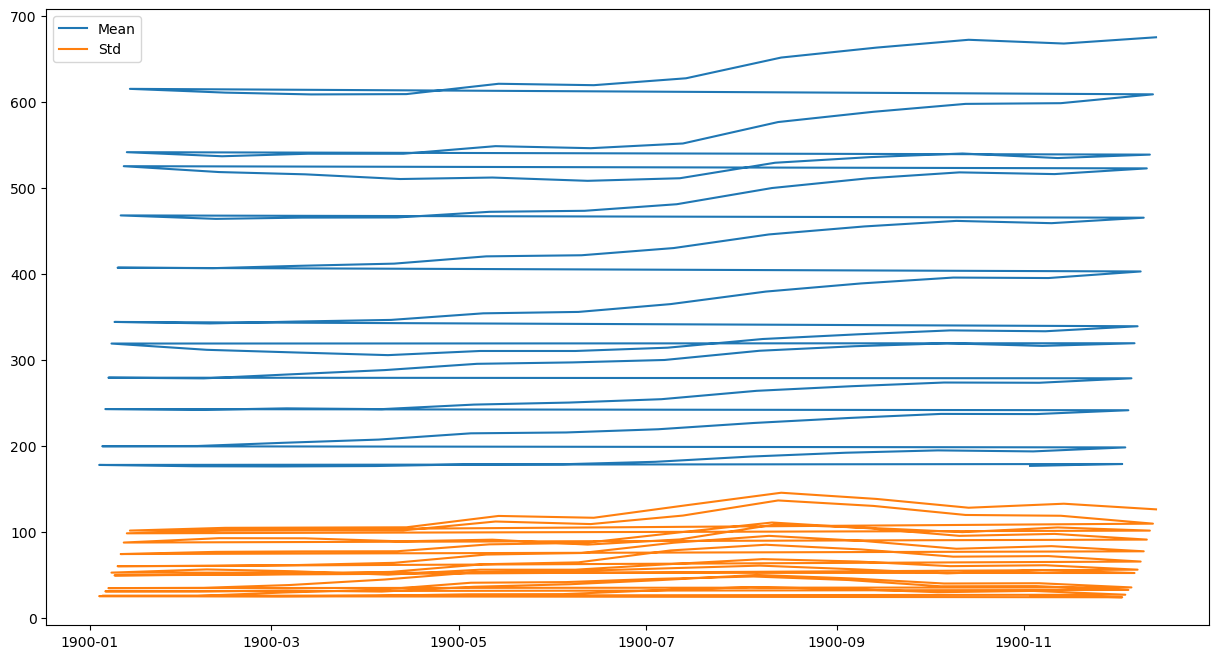

In [16]:
rollmean = df.rolling(window=11).mean()
rollstd = df.rolling(window=11).std()
#plt.plot(df, label='Original')
plt.plot(rollmean, label='Mean')
plt.plot(rollstd, label='Std')
plt.legend()
plt.show()  # the mean and variance dont have the same trend over time...so I doubt if data is stationery...checking adfuller results

In [17]:
from statsmodels.tsa.stattools import adfuller

adfuller(df)  #data is not stationery as PACF plot is showing timeseries characteristics at lag 1, lag 7 and lag10 while ACF plot isnt showing the decay during that time period...the decay is hephezard. But both graphs are showing decay so there is seasonality..call for sarima model

(1.1088250591467355,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

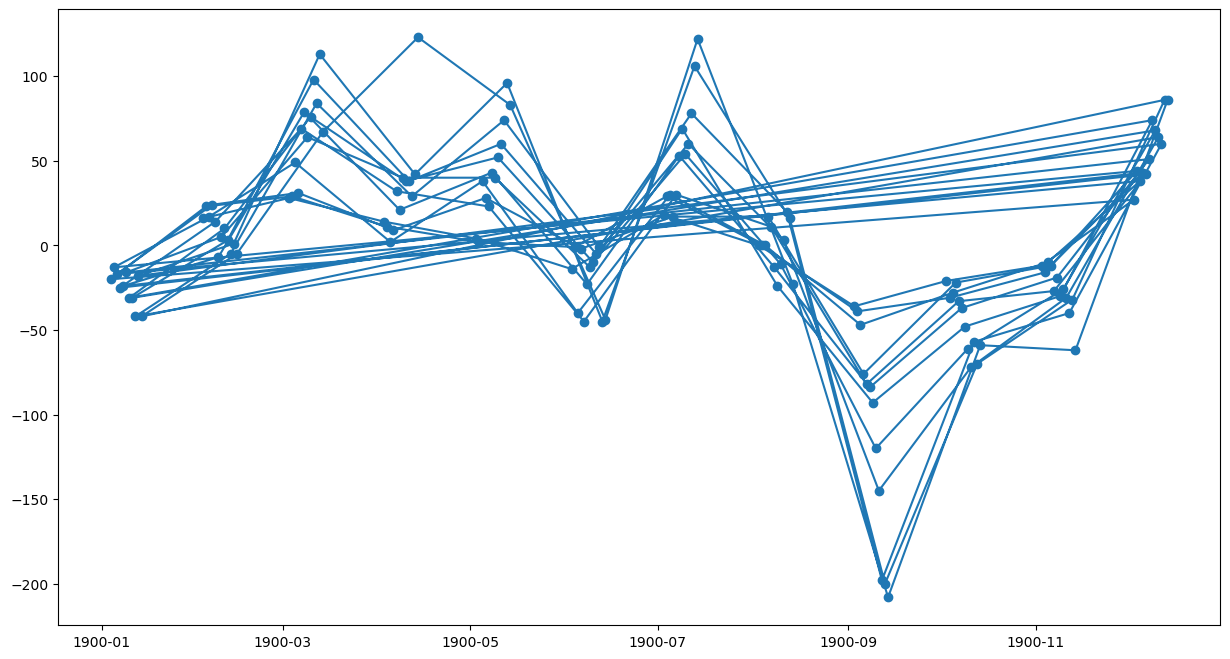

In [18]:
df['Diff'] = df['Number of Tractor Sold'].diff()
plt.plot(df.index, df['Diff'], marker='o')


In [19]:
df.fillna(0, inplace=True)
df.isna().sum()

Number of Tractor Sold    0
Diff                      0
dtype: int64

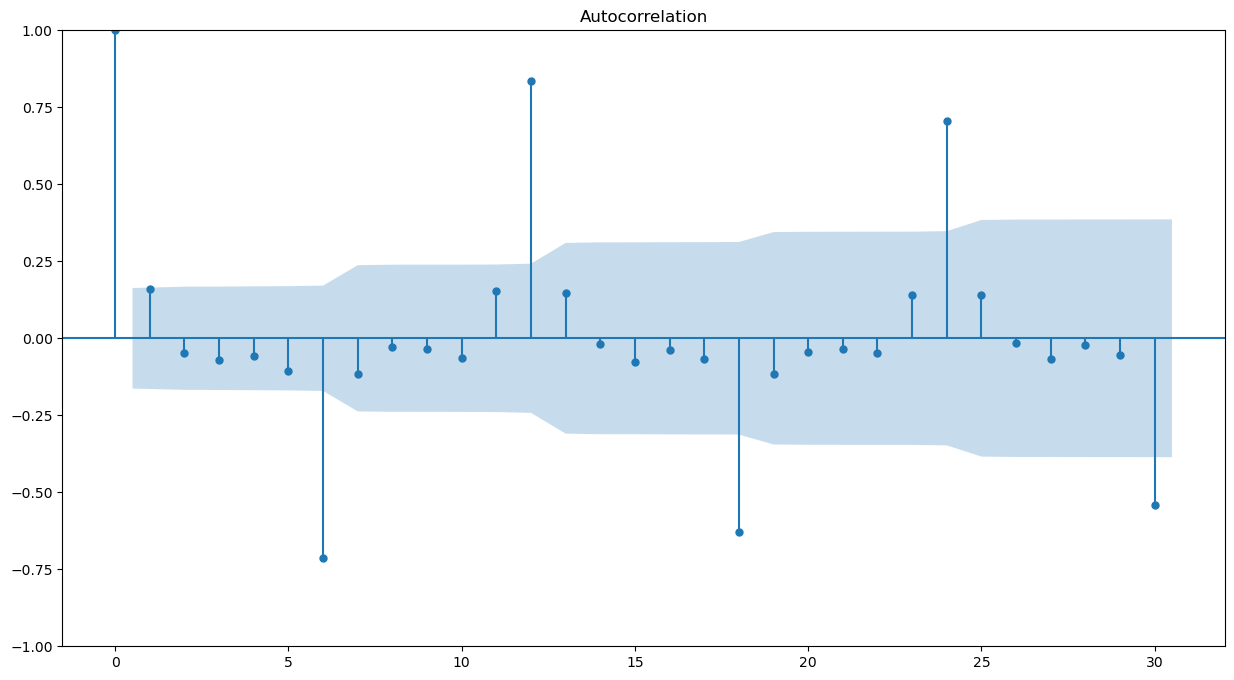

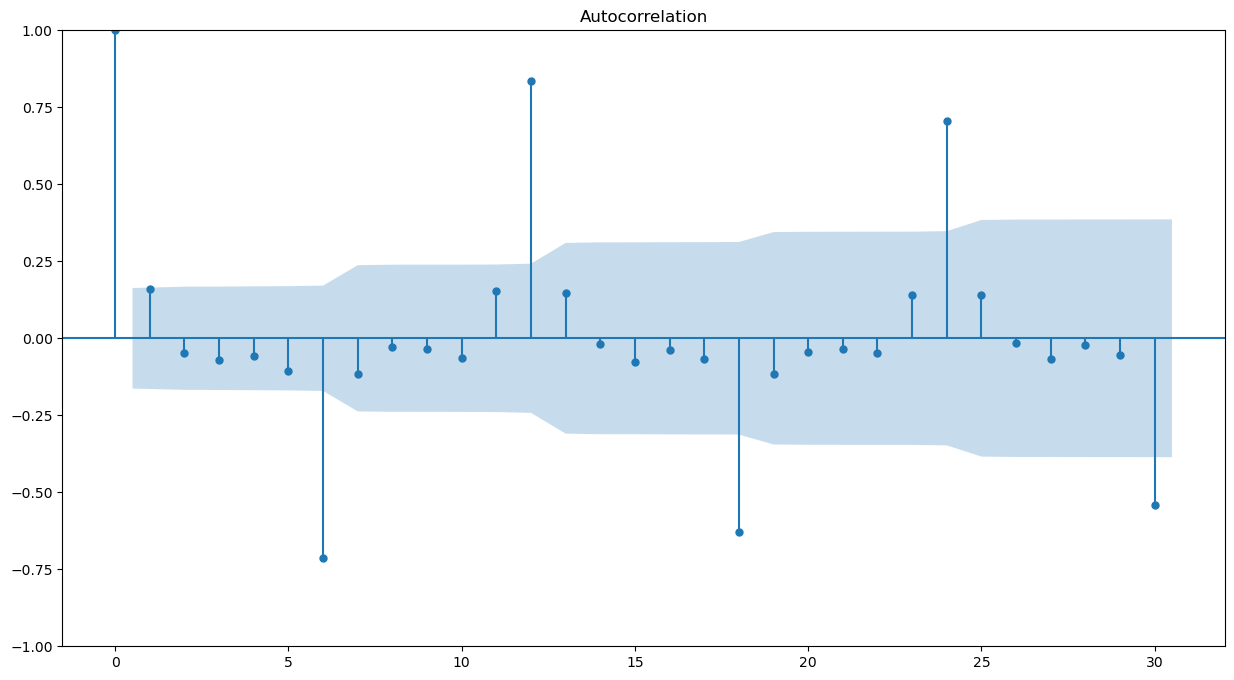

In [20]:
#Now do acf & pacf plots to find optimal order

plot_acf(df['Diff'], lags=30)

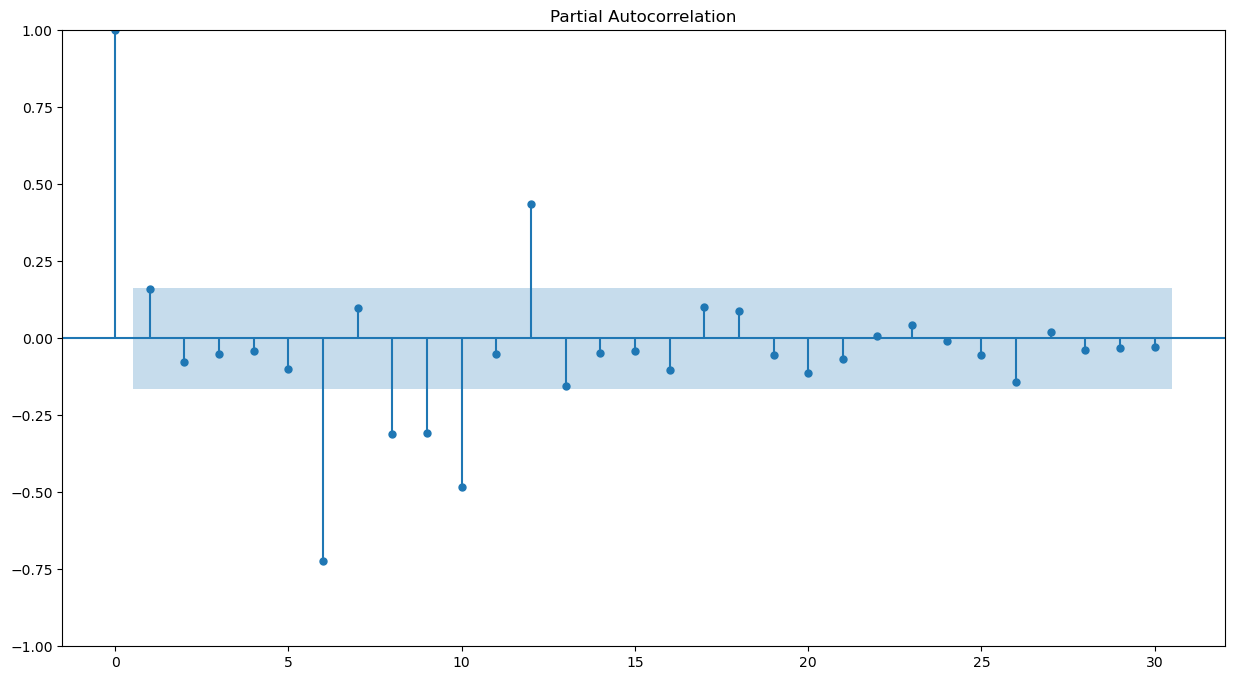

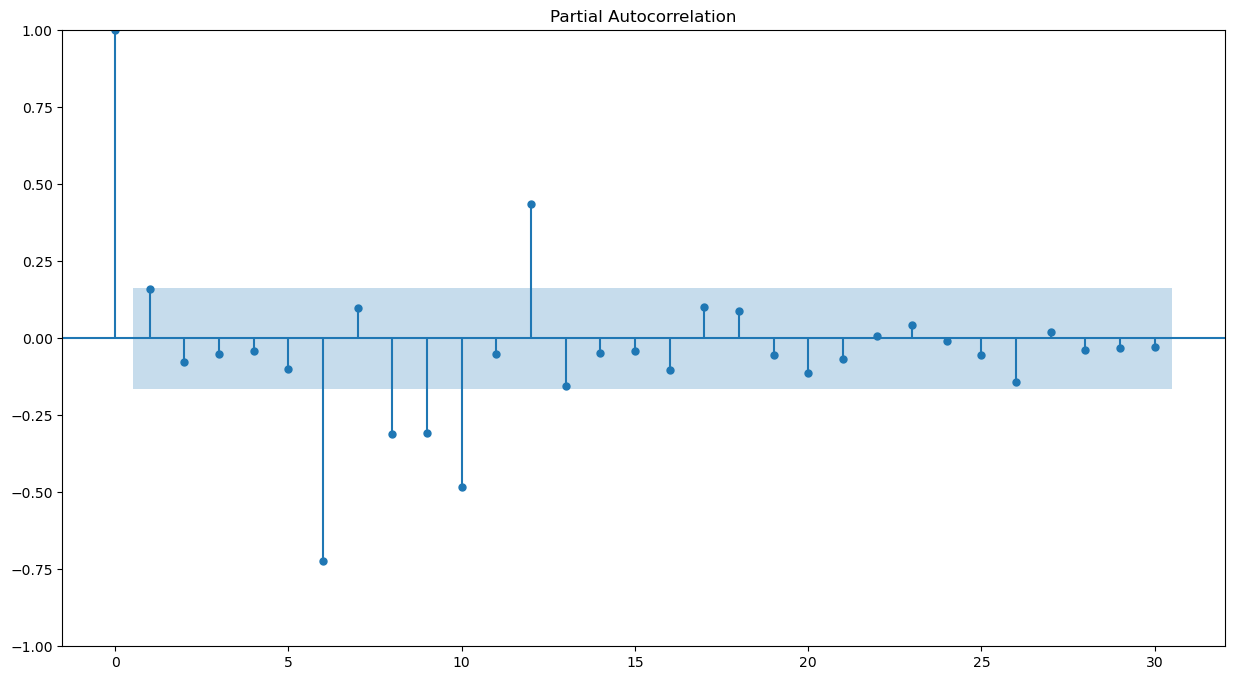

In [21]:

plot_pacf(df['Diff'], lags=30)

In [22]:
#Here pacf is showing the Timeseries characteristics at lag 6, lag12....and acf is showing the decay at these intervals..so it's a perfect Timeseries data
#with seasonality.

In [23]:
adfuller(df['Diff'])

(-2.453668008851863,
 0.12715808081607627,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1075.914071926729)

In [24]:
#So make the data stationery
import itertools

p = range(0,12)
q=0
d = 1
m= range(2,12)

pdqm = list(itertools.product(p,[d],[q],m))
pdq = list(itertools.product(p,[d],[q]))
print('The params are:{},'.format(pdqm))


The params are:[(0, 1, 0, 2), (0, 1, 0, 3), (0, 1, 0, 4), (0, 1, 0, 5), (0, 1, 0, 6), (0, 1, 0, 7), (0, 1, 0, 8), (0, 1, 0, 9), (0, 1, 0, 10), (0, 1, 0, 11), (1, 1, 0, 2), (1, 1, 0, 3), (1, 1, 0, 4), (1, 1, 0, 5), (1, 1, 0, 6), (1, 1, 0, 7), (1, 1, 0, 8), (1, 1, 0, 9), (1, 1, 0, 10), (1, 1, 0, 11), (2, 1, 0, 2), (2, 1, 0, 3), (2, 1, 0, 4), (2, 1, 0, 5), (2, 1, 0, 6), (2, 1, 0, 7), (2, 1, 0, 8), (2, 1, 0, 9), (2, 1, 0, 10), (2, 1, 0, 11), (3, 1, 0, 2), (3, 1, 0, 3), (3, 1, 0, 4), (3, 1, 0, 5), (3, 1, 0, 6), (3, 1, 0, 7), (3, 1, 0, 8), (3, 1, 0, 9), (3, 1, 0, 10), (3, 1, 0, 11), (4, 1, 0, 2), (4, 1, 0, 3), (4, 1, 0, 4), (4, 1, 0, 5), (4, 1, 0, 6), (4, 1, 0, 7), (4, 1, 0, 8), (4, 1, 0, 9), (4, 1, 0, 10), (4, 1, 0, 11), (5, 1, 0, 2), (5, 1, 0, 3), (5, 1, 0, 4), (5, 1, 0, 5), (5, 1, 0, 6), (5, 1, 0, 7), (5, 1, 0, 8), (5, 1, 0, 9), (5, 1, 0, 10), (5, 1, 0, 11), (6, 1, 0, 2), (6, 1, 0, 3), (6, 1, 0, 4), (6, 1, 0, 5), (6, 1, 0, 6), (6, 1, 0, 7), (6, 1, 0, 8), (6, 1, 0, 9), (6, 1, 0, 10), (6, 1

In [25]:
#Perform train test split

df.tail(50)
test = df.iloc[132:]
train = df.iloc[0:132]
train.tail(5)

,Number of Tractor Sold,Diff
Timestamp,,
1900-08-13,783,16.0
1900-09-13,583,-200.0
1900-10-13,513,-70.0
1900-11-13,481,-32.0
1900-12-13,567,86.0


In [26]:
train

,Number of Tractor Sold,Diff
Timestamp,,
1900-01-03,141,0.0
1900-02-03,157,16.0
1900-03-03,185,28.0
1900-04-03,199,14.0
1900-05-03,203,4.0
...,...,...
1900-08-13,783,16.0
1900-09-13,583,-200.0
1900-10-13,513,-70.0


In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

for param, paramS in zip(pdq, pdqm):
    model = SARIMAX(train['Number of Tractor Sold'], order=param, seasonal_order=paramS)
    result_sarima = model.fit()
    print('param: {} and paramS: {} and AIC:{},'.format(param, paramS, result_sarima.aic))
    

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

param: (0, 1, 0) and paramS: (0, 1, 0, 2) and AIC:1483.4380091002472,
param: (1, 1, 0) and paramS: (0, 1, 0, 3) and AIC:1475.7388160635046,
param: (2, 1, 0) and paramS: (0, 1, 0, 4) and AIC:1437.9159471038836,
param: (3, 1, 0) and paramS: (0, 1, 0, 5) and AIC:1397.591644393091,
param: (4, 1, 0) and paramS: (0, 1, 0, 6) and AIC:1504.14039476483,


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

param: (5, 1, 0) and paramS: (0, 1, 0, 7) and AIC:1323.981528995691,


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


param: (6, 1, 0) and paramS: (0, 1, 0, 8) and AIC:1242.492526006121,


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


param: (7, 1, 0) and paramS: (0, 1, 0, 9) and AIC:1292.968897805942,


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


param: (8, 1, 0) and paramS: (0, 1, 0, 10) and AIC:1270.980074009272,


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarn

param: (9, 1, 0) and paramS: (0, 1, 0, 11) and AIC:1171.478446314692,


ValueError: Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.

param: (9, 1, 0) and paramS: (0, 1, 0, 11) and AIC:1171.478446314692 is most optimal as AIC is the least here.

In [ ]:
#build model with these  : p=0,d=1, q=0, m=11
model = SARIMAX(train['Number of Tractor Sold'], order=(0,1,0), seasonal_order=(0,1,0,11))
result_sarima = model.fit()
result_sarima.summary()


In [ ]:
SARIMA_predict = result_sarima.forecast(len(test))

In [ ]:
#plotting
plt.rcParams['figure.figsize'] = 15,8
plt.plot(train, label='Train data')
plt.plot(test, label='Test data')
plt.plot(test.index, SARIMA_predict, label='Predicted data')
plt.legend()
plt.show()

In [29]:
#RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE:',np.sqrt(mean_squared_error(test, SARIMA_predict)))
print('MAPE:',mean_absolute_percentage_error(test, SARIMA_predict))

NameError: name 'SARIMA_predict' is not defined

**MODEL IMPROVEMENT**

In [ ]:
#Using Exponential Smoothing Technique

from statsmodels.tsa.api import ExponentialSmoothing

exp = ExponentialSmoothing(train, trend='additive', seasonal='multiplicative', seasonal_periods=11)
model = exp.fit(optimized=True)
model.summary()

In [ ]:
Exp_predict = model.forecast(len(test))

In [ ]:
#plotting
plt.rcParams['figure.figsize'] = 15,8
plt.plot(train, label='Train data')
plt.plot(test, label='Test data')
plt.plot(test.index, Exp_predict, label='Predicted data')
plt.legend()
plt.show()

In [28]:
print(np.sqrt(mean_squared_error(test, Exp_predict)))
print(mean_absolute_percentage_error(test, Exp_predict))

NameError: name 'Exp_predict' is not defined

In [ ]:
#plotting residuals

residual = result_sarima.resid
plt.plot(train.index, residual, marker='o')
plt.show()

In [ ]:
df['Number of Tractor Sold'].min()

In [ ]:
df['Number of Tractor Sold'].max()